<a href="https://colab.research.google.com/github/HARSHIT097/COMPUTER_VISION/blob/main/A_Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Q.3. Write a program on object detection for given dataset.

####Answer

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Conv2D,Flatten,Dense,MaxPool2D,Input
from keras.models import Model,Sequential
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import io
import os
from keras.preprocessing.image import img_to_array,load_img
from keras.applications import VGG16
from keras.optimizers import Adam
import random
import imutils

# Uploading files in google collab and unzipping them and saving in a folder name images

In [ ]:
from google.colab import files
uploaded= files.upload()
file=pd.read_csv(io.BytesIO(uploaded['annotations.csv']))
print(file)

Saving annotations.csv to annotations.csv
         image_name  x1  y1   x2   y2
0    image_0270.jpg  55  27  344  102
1    image_0793.jpg  50  29  341  143
2    image_0656.jpg  49  22  347  111
3    image_0515.jpg  40   7  348  138
4    image_0507.jpg  62  22  339  139
..              ...  ..  ..  ...  ...
795  image_0257.jpg  47  12  346  123
796  image_0623.jpg  54  21  348  105
797  image_0552.jpg  49  26  347  115
798  image_0497.jpg  54  33  349  127
799  image_0570.jpg  55  33  348  132

[800 rows x 5 columns]


In [ ]:
from google.colab import files
uploaded=files.upload()

image_folder=io.BytesIO(uploaded['images.zip'])

Saving images.zip to images.zip


In [ ]:
!unzip images.zip

Archive:  images.zip
   creating: images/
  inflating: images/image_0004.jpg   
  inflating: images/image_0005.jpg   
  inflating: images/image_0006.jpg   
  inflating: images/image_0007.jpg   
  inflating: images/image_0008.jpg   
  inflating: images/image_0010.jpg   
  inflating: images/image_0011.jpg   
  inflating: images/image_0012.jpg   
  inflating: images/image_0013.jpg   
  inflating: images/image_0014.jpg   
  inflating: images/image_0016.jpg   
  inflating: images/image_0017.jpg   
  inflating: images/image_0018.jpg   
  inflating: images/image_0019.jpg   
  inflating: images/image_0020.jpg   
  inflating: images/image_0022.jpg   
  inflating: images/image_0023.jpg   
  inflating: images/image_0024.jpg   
  inflating: images/image_0025.jpg   
  inflating: images/image_0026.jpg   
  inflating: images/image_0028.jpg   
  inflating: images/image_0029.jpg   
  inflating: images/image_0030.jpg   
  inflating: images/image_0031.jpg   
  inflating: images/image_0032.jpg   
  inflat

In [ ]:
#storing images
data=[]

#storing annotations
target=[]

filename=[]
images_folder_path="/content/images/"


# Reading/loading data and splitting it for training and testing

In [ ]:
for index,rows in file.iterrows():
  filen,start_x,start_y,end_x,end_y=rows["image_name"],rows["x1"],rows["y1"],rows["x2"],rows["y2"]
  
  filename.append(filen)

  image_path=images_folder_path+filen
  image=cv2.imread(image_path)
  h,w=image.shape[:2]

  # annotations should be in 0 to 1 range
  start_x=start_x/w
  start_y=start_y/h
  end_x=end_x/w
  end_y=end_y/h

  image=load_img(image_path,target_size=(224,224))
  image=img_to_array(image)

  data.append(image)
  target.append((start_x,start_y,end_x,end_y))

In [ ]:
#Making the pixels value in the range of 0 to 1
data=np.array(data,dtype="float32")/255.0
targets=np.array(target,dtype="float32")


In [ ]:
train_images,test_images,train_targets,test_targets=train_test_split(data,targets,test_size=0.1,random_state=48)

# APproach-1 Applying Sequential Model

In [ ]:
'''
model=Sequential()
model.add(Conv2D(64,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(512,(3,3),activation="relu",padding="same"))
model.add(Conv2D(512,(3,3),activation="relu",padding="same"))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(4,activation="sigmoid"))


opt=Adam(lr=0.0001)
model.compile(loss="mse",optimizer=opt)

print(model.summary())
'''

'\nmodel=Sequential()\nmodel.add(Conv2D(64,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))\nmodel.add(Conv2D(64,(3,3),activation="relu",padding="same"))\nmodel.add(MaxPool2D(2,2))\nmodel.add(Conv2D(128,(3,3),activation="relu",padding="same"))\nmodel.add(Conv2D(128,(3,3),activation="relu",padding="same"))\nmodel.add(MaxPool2D(2,2))\nmodel.add(Conv2D(256,(3,3),activation="relu",padding="same"))\nmodel.add(Conv2D(256,(3,3),activation="relu",padding="same"))\nmodel.add(MaxPool2D(2,2))\nmodel.add(Conv2D(512,(3,3),activation="relu",padding="same"))\nmodel.add(Conv2D(512,(3,3),activation="relu",padding="same"))\nmodel.add(Flatten())\nmodel.add(Dense(256,activation="relu"))\nmodel.add(Dense(128,activation="relu"))\nmodel.add(Dense(64,activation="relu"))\nmodel.add(Dense(32,activation="relu"))\nmodel.add(Dense(4,activation="sigmoid"))\n\n\nopt=Adam(lr=0.0001)\nmodel.compile(loss="mse",optimizer=opt)\n\nprint(model.summary())\n'

# going further with trasfer learning model

In [ ]:
#model architecture
# loading the pre-trained VGG16 model
vgg=VGG16(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))

# freezing the pre-trained model
vgg.trainable=False


flatten=vgg.output
flatten=Flatten()(flatten)
bb=Dense(256,activation="relu")(flatten)
bb=Dense(128,activation="relu")(bb)
bb=Dense(64,activation="relu")(bb)
bb=Dense(32,activation="relu")(bb)
bb=Dense(4,activation="sigmoid")(bb)

model=Model(inputs=vgg.input,outputs=bb)

opt=Adam(lr=0.0001)
model.compile(loss="mse",optimizer=opt)

print(model.summary())

58892288/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
# Initialising the optimizer and loss functions

lr = 0.0001
EPOCHS = 10
BATCH_SIZE = 16

optimizer = Adam(lr = lr)
model.compile(loss="mse", optimizer = optimizer)

In [ ]:
# train the model

hist = model.fit(train_images, train_targets,
          validation_data = (test_images, test_targets),
          batch_size=BATCH_SIZE, 
          epochs = EPOCHS, verbose = 1)


Epoch 1/10
45/45 [==============================] - 11s 75ms/step - loss: 0.0364 - val_loss: 0.0085
Epoch 2/10
45/45 [==============================] - 3s 66ms/step - loss: 0.0106 - val_loss: 0.0076
Epoch 3/10
45/45 [==============================] - 3s 65ms/step - loss: 0.0091 - val_loss: 0.0078
Epoch 4/10
45/45 [==============================] - 3s 66ms/step - loss: 0.0073 - val_loss: 0.0088
Epoch 5/10
45/45 [==============================] - 3s 66ms/step - loss: 0.0058 - val_loss: 0.0078
Epoch 6/10
45/45 [==============================] - 3s 67ms/step - loss: 0.0077 - val_loss: 0.0081
Epoch 7/10
45/45 [==============================] - 3s 66ms/step - loss: 0.0055 - val_loss: 0.0080
Epoch 8/10
45/45 [==============================] - 3s 67ms/step - loss: 0.0043 - val_loss: 0.0087
Epoch 9/10
45/45 [==============================] - 3s 66ms/step - loss: 0.0047 - val_loss: 0.0080
Epoch 10/10
45/45 [==============================] - 3s 67ms/step - loss: 0.0028 - val_loss: 0.0081


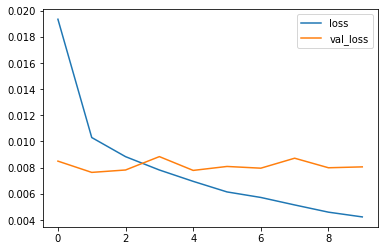

In [ ]:
pd.DataFrame(hist.history).plot()
plt.show()

# Testing

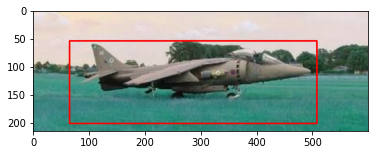

In [ ]:
# Testing on single image
test_image_path=images_folder_path+random.choice(filename)
test_image=load_img(test_image_path,target_size=(224,224))
test_image=np.array(test_image)/255
test_image=np.expand_dims(test_image,axis=0)

prediction=model.predict(test_image)[0]
(startX,startY,endX,endY)=prediction

test_img=cv2.imread(test_image_path)
test_img=imutils.resize(test_img,width=600)
(h,w)=test_img.shape[:2]

startX=int(startX*w)
startY=int(startY*h)
endX=int(endX*w)
endY=int(endY*h)

cv2.rectangle(test_img,(startX,startY),(endX,endY),(255,0,0),2)
plt.imshow(test_img)
plt.show()
